# XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data = pd.read_csv(file_url)

In [2]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
pd.options.display.max_columns = 40 # 40개 까지 보겠다!

In [4]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [6]:
data[['pref_o_attractive']]

,pref_o_attractive
0,35.0
1,60.0
2,19.0
3,30.0
4,30.0
...,...
8373,10.0
8374,50.0
8375,40.0
8376,10.0


In [7]:
round(data.describe(), 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [8]:
data.isna().mean()

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

결측치에 대해서 -99로 채워넣자 -> 해당사람은 해당 항목에 대해 응답하지 않았다는 의미로 

단, 중요도와 관련된 변수들은 결측치를 제거하는 방향으로, 피처 엔지니어링에서 중요도 X 점수로 계산하기 때문에 

In [9]:
data = data.dropna(subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 
                          'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important'])

In [10]:
data = data.fillna(-99)

### 피처 엔지니어링

나이
- 나이차가 얼마나 나는가? 
- 결측치가 있으므로 단순히 나이차로만 계산X, '알수 없음' 의미로 -99로 
- 성별: 단순한 나이차보다 남자가 여자보다 많은지, 반대인지 고려

In [11]:
def age_gap(x): 
    if x['age'] == -99:
        return -99
    elif x['age_o'] == -99:
        return -99
    elif x['gender'] == 'female':
        return x['age_o'] - x['age']
    else: 
        return x['age'] - x['age_o']

In [12]:
data['age_gap'] = data.apply(age_gap, axis=1)

In [13]:
data['age_gap_abs'] = abs(data['age_gap'])

인종 
- 본인과 상대방의 인종이 같으면 1, 다르면 -1, 결측치는 -99

In [14]:
def same_race(x):
    if x['race'] == -99 or x['race_o'] == -99:
        return -99
    elif x['race'] == x['race_o']:
        return 1
    else :
        return -1

In [15]:
data['same_race'] = data.apply(same_race, axis=1)

In [16]:
data['same_race'].value_counts()

-1    4844
 1    3286
Name: same_race, dtype: int64

In [17]:
def same_race_point(x):
    if x['same_race'] == -99:
        return -99
    else:
        return x['same_race'] * x['importance_same_race']

In [18]:
data['same_race_point'] = data.apply(same_race_point, axis=1)

In [19]:
data['same_race_point'].value_counts()

-1.0     1765
 1.0      984
-3.0      611
-2.0      575
 2.0      363
-5.0      354
 3.0      353
 8.0      321
-6.0      316
-7.0      312
-8.0      310
 5.0      290
-4.0      272
 7.0      224
 4.0      222
-9.0      211
 6.0      200
 9.0      193
 10.0     130
-10.0     116
 0.0        8
Name: same_race_point, dtype: int64

attractive, sincere.. 

In [20]:
def rating(data, importance, score): 
    if data[importance] == -99:
        return -99
    elif data[score] == -99:
        return -99
    else:
        return data[importance] * data[score]

In [21]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [22]:
partner_imp = data.columns[8:14] # 상대방의 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26] # 본인의 중요도
my_rate_partner = data.columns[26:32] #상대방에 대한 본인의 평가

In [23]:
# 상대방 관련 새 변수 이름을 저장하는 리스트 
new_label_partner = ['attractive_p', 'sincere_partner_p', 'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p']

# 본인 관련 새 변수 이름을 저장하는 리스트 
new_label_me = ['attractive_m', 'sincere_partner_m', 'intelligence_m', 'funny_m', 'ambition_m', 'shared_interests_m']

In [24]:
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me): 
    print(i, '&', j, '&', k)

attractive_p & pref_o_attractive & attractive_o
sincere_partner_p & pref_o_sincere & sincere_o
intelligence_p & pref_o_intelligence & intelligence_o
funny_p & pref_o_funny & funny_o
ambition_p & pref_o_ambitious & ambitous_o
shared_interests_p & pref_o_shared_interests & shared_interests_o


In [25]:
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
    data[i] = data.apply(lambda x: rating(x, j, k), axis = 1)

In [26]:
#data['attractive_p'].histt()

In [27]:
data = pd.get_dummies(data, columns=['gender', 'race', 'race_o'], drop_first=True) # 더미 변수로 변환

### Split train and test datasets

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('match', axis=1), data['match'], test_size = 0.2, random_state = 100)

In [29]:
print(len(X_train), len(X_test))

6504 1626


In [30]:
import xgboost as xgb

In [31]:
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state = 100)

In [32]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [33]:
pred = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8690036900369004

In [35]:
print(confusion_matrix(y_test, pred))

[[1298   67]
 [ 146  115]]


In [36]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.77      0.70      0.72      1626
weighted avg       0.86      0.87      0.86      1626



In [37]:
max_depth = [3, 5, 10]
learning_rate = [0.01, 0.05, 0.1]

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
parameters = {
    'learning_rate' : [0.01, 0.1, 0.3], 
    'max_depth': [5, 7, 10], 
    'subsample': [0.5, 0.7, 1],
    'n_estimators': [300, 500, 1000]
}

In [40]:
model = xgb.XGBClassifier() #모델 객체 생성 
gs_model = GridSearchCV(model, parameters, n_jobs=-1, scoring='f1', cv=5)

In [41]:
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [42]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 1}

In [43]:
pred = gs_model.predict(X_test)

In [44]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1365
           1       0.64      0.47      0.54       261

    accuracy                           0.87      1626
   macro avg       0.77      0.71      0.73      1626
weighted avg       0.86      0.87      0.86      1626



In [45]:
model = xgb.XGBClassifier(learning_rate = 0.3, max_depth = 5, n_estimators= 1000, subsample = 1, random_state = 100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [46]:
model.feature_importances_

array([0.00682205, 0.01067888, 0.01021876, 0.01225274, 0.01003178,
       0.01495277, 0.01136553, 0.01424472, 0.01212922, 0.01307238,
       0.01525774, 0.08169734, 0.012402  , 0.01461854, 0.03959427,
       0.00883187, 0.02817536, 0.01523846, 0.01147864, 0.01681696,
       0.012889  , 0.01354589, 0.010208  , 0.03593181, 0.00991528,
       0.00948846, 0.04129067, 0.01016737, 0.01642261, 0.01027978,
       0.00920886, 0.01910897, 0.0933546 , 0.03107196, 0.02581554,
       0.01295175, 0.01323178, 0.0102599 , 0.01384901, 0.01061164,
       0.01403227, 0.0123116 , 0.01403474, 0.00860825, 0.00863217,
       0.01344784, 0.01069123, 0.01402041, 0.02434931, 0.04386926,
       0.02556059, 0.01346822, 0.00427857, 0.02321252], dtype=float32)

In [47]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})

In [48]:
feature_imp

,features,values
0,has_null,0.006822
1,age,0.010679
2,age_o,0.010219
3,importance_same_race,0.012253
4,importance_same_religion,0.010032
5,pref_o_attractive,0.014953
6,pref_o_sincere,0.011366
7,pref_o_intelligence,0.014245
8,pref_o_funny,0.012129
9,pref_o_ambitious,0.013072


<Axes: xlabel='values', ylabel='features'>

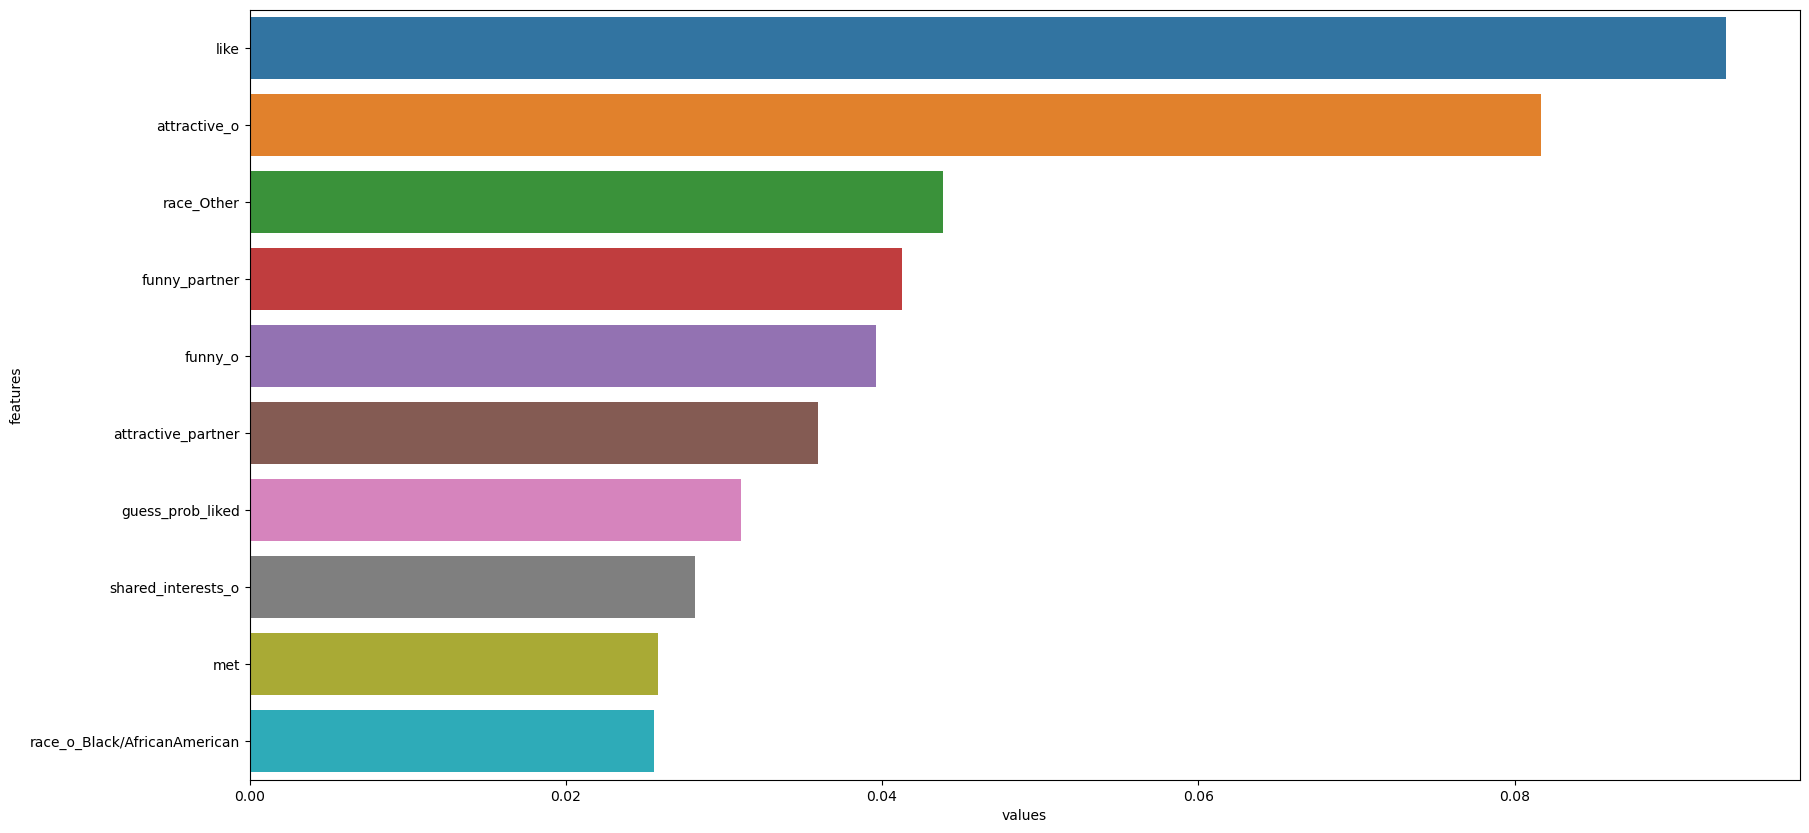

In [49]:
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features', data=feature_imp.sort_values(by='values', ascending=False).head(10))

배깅 : 부트스트랩(bootstrap) 훈련 셋을 사용하는 트리모델
- 부트스트랩: 데이터의 일부분을 무작위로 반복 추출하는 방법 -> 오버피팅을 방지한다

랜덤포레스트: 이전에 만든 트리와 상관없이 새로운 데이터 부분집합과 변수 부분집합을 이용해서 만들고 평가 

부스팅: 각 트리를 순차적으로 만들면서 이전 트리의 정보를 이용 -> 시너지효과
- 에이다부스트(AdaBoost(Adaptive Boosting)) : 이전 단계에서의 분류 결과에 따라 각 데이터에 가중치를 부여/수정함
- 경사부스팅(Gradient Boosting): 경사하강법을 이용하며, 이전 모델의 에러를 기반으로 다음 트리를 만든다. ex XGBoost, LightGBM, Catboost 
- XGBoost(Exgtreme Gradient Boosting): 계산 성능화에 있어서 개선, 병렬화(Parallelization), 분산컴퓨팅(Distributed Computing), 캐시 최적화(Cache Optimization) 등 
- 기존 경사하강법이 접점의 기울기를 계산하고 매개변수를 이동한 반면, XGBoost에서는 2차도함수(2번 미분한 함수)를 활용해 더 적절한 이동방향과 이동 크기를 찾아내어 더 빠른 시간에 전역 최소값에 도달한다
 - 트리모델이 진화할수록 더 좋은 예측 성능을 보이는 동시에 오버피팅문제가 더 심해질 수도 있다. XGBoost는 이런 부작용을 줄일 목적으로 Lasso(L1) Ridge(L2) 정규화 파라미터를 지원한다. 